## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)
# we use the above code to import all the libraries.

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#load the dataset from keras and then assign it to x_train and y_train.

### Find no.of samples are there in training and test datasets

In [38]:
x_train.shape
# we use the code to find the no of training samples in x_train. We can see that there are 60000 samples.

(60000, 28, 28)

In [39]:
x_test.shape
# we use the code to find the no of test samples in test data. we can see that there are 10000 samples.

(10000, 28, 28)

### Find dimensions of an image in the dataset

In [40]:
x_train[0].shape
# we use the above code to find the dimensions of an image in the dataset. In our case, this is 28*28

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train=keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')
y_test = keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')
# we use the above code to convert train and test labels to one hot vectors using keras

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
# we use the above code to normalize the data by changing the type to float32 and then divide it by 255.

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
# we use the above code to reshape the data to be fed to the convolution filter. The data is changed to 28*28*1

In [0]:
x_test=x_test.reshape(x_test.shape[0], 28,28,1)
# we use the above code to reshape the data to be fed to the convolution filter. The data is changed to 28*28*1

### Import the necessary layers from keras to build the model

In [0]:
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

In [47]:
# define the model
model=Sequential()

#define the convolution network
model.add(Convolution2D(32,3,3, input_shape=(28,28,1)))

#define the activation
model.add(Activation('relu'))

#add another activation
model.add(Convolution2D(32,3,3))
model.add(Activation('relu'))

#add the fully connected layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

# Prediction Layer
model.add(Dense(10))
model.add(Activation('softmax'))

#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#store the model
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

#fit the model
model.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.3749 - acc: 0.8648 - val_loss: 0.2962 - val_acc: 0.8962
Epoch 2/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.2294 - acc: 0.9159 - val_loss: 0.2686 - val_acc: 0.9033
Epoch 3/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.1679 - acc: 0.9377 - val_loss: 0.2510 - val_acc: 0.9146
Epoch 4/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.1161 - acc: 0.9565 - val_loss: 0.2756 - val_acc: 0.9135
Epoch 5/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0761 - acc: 0.9723 - val_loss: 0.3165 - val_acc: 0.9158
Epoch 6/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.0518 - acc: 0.9812 - val_loss: 0.3529 - val_acc: 0.9111
Epoch 7/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.0350 - acc: 0.9870 - val_loss: 0.3798 - 

In [48]:
loss_and_metrics = model.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 0s 48us/step
[0.5585767641836311, 0.909]


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [49]:
# define the model
model2=Sequential()

#define the convolution network
model2.add(Convolution2D(32,3,3, input_shape=(28,28,1)))

#define the activation
model2.add(Activation('relu'))

#add another activation
model2.add(Convolution2D(32,3,3))
model2.add(Activation('relu'))

#add max pool and dropout
# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2)))
    
# Dropout
model2.add(Dropout(0.25))

#add the fully connected layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

#compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#store the model
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

#fit the model
model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.3916 - acc: 0.8584 - val_loss: 0.2982 - val_acc: 0.8911
Epoch 2/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.2603 - acc: 0.9037 - val_loss: 0.2738 - val_acc: 0.8985
Epoch 3/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.2147 - acc: 0.9209 - val_loss: 0.2348 - val_acc: 0.9155
Epoch 4/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.1823 - acc: 0.9312 - val_loss: 0.2170 - val_acc: 0.9213
Epoch 5/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.1544 - acc: 0.9426 - val_loss: 0.2346 - val_acc: 0.9163
Epoch 6/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.1335 - acc: 0.9500 - val_loss: 0.2331 - val_acc: 0.9219
Epoch 7/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.1103 - acc: 0.9587 - val_loss: 0.2445 - 

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

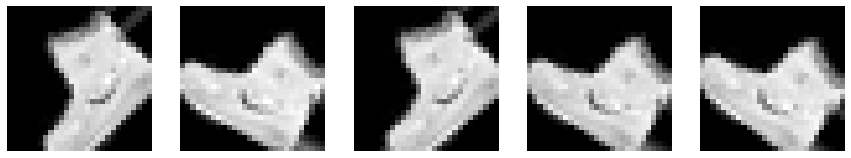

In [51]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [52]:
model2.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
  19/1875 [..............................] - ETA: 18s - loss: 1.9800 - acc: 0.5099

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 18s 10ms/step - loss: 0.5035 - acc: 0.8176 - val_loss: 0.2699 - val_acc: 0.9091
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3629 - acc: 0.8682 - val_loss: 0.2909 - val_acc: 0.9052
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3308 - acc: 0.8788 - val_loss: 0.2757 - val_acc: 0.9084
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3078 - acc: 0.8862 - val_loss: 0.2748 - val_acc: 0.9124
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2921 - acc: 0.8905 - val_loss: 0.2715 - val_acc: 0.9120
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2836 - acc: 0.8947 - val_loss: 0.2710 - val_acc: 0.9128
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2745 - acc: 0.8981 - val_loss: 0.2735 - val_acc: 0.9115
Epoch 8/10
1875/1875 [==============================] - 18s

###  Report the final train and validation accuracy

In [86]:
loss_and_metrics_train = model2.evaluate(x_train, y_train)
loss_and_metrics_test=model2.evaluate(x_test, y_test)
print(loss_and_metrics_train)
print(loss_and_metrics_test)

10000/10000 [==============================] - 0s 50us/step
[0.14747887743103008, 0.94555]
[0.2780812249034643, 0.9125]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [0]:
(x_cifartrain, y_cifartrain), (x_cifartest, y_cifartest) = cifar10.load_data()

In [57]:
x_cifartrain.shape

(50000, 32, 32, 3)

In [76]:
x_cifartrain.dtype

dtype('uint8')

In [0]:
x_cifartrain_255=x_cifartrain/255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# This will do preprocessing and realtime data augmentation:
datagencifar = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images



### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagencifar.fit(x_cifartrain_255)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

[]

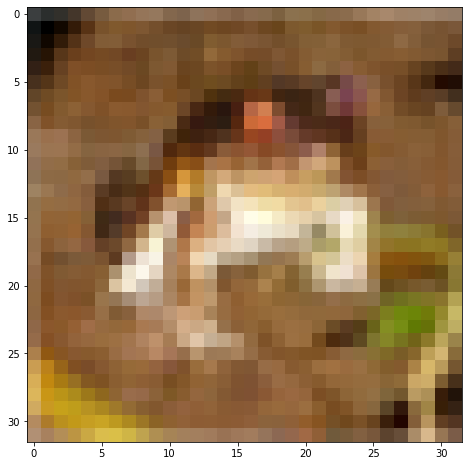

In [84]:
plt.imshow(x_cifartrain_255[0].squeeze(), cmap='gray')
plt.plot()

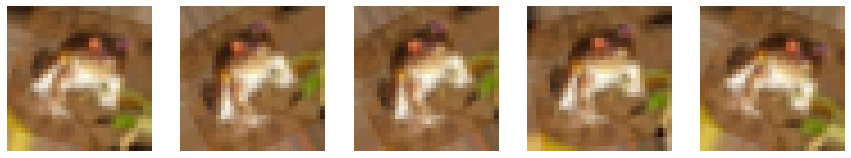

In [85]:
gencifar = datagencifar.flow(x_cifartrain_255[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gencifar.next().squeeze(), cmap='gray')
    plt.plot()